# Training Linear Models

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear regression using the Normal Equation

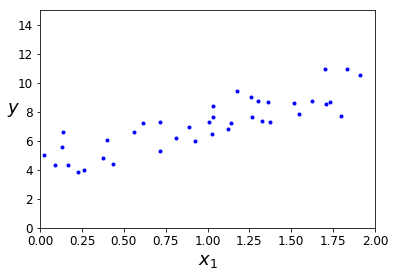

In [3]:
import numpy as np

X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.10685383]), array([[2.99989438]]))

In [5]:
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[ 4.10685383],
       [10.1066426 ]])

## Linear regression using batch gradient descent

In [9]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

eta = 0.1 #learning rate
n_iterations = 1000
m = 100 #number of features
theta = np.random.randn(2, 1) #random initialization of the parameters

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients #next step (update parameters)

In [10]:
theta

array([[4.10685383],
       [2.99989438]])

In [11]:
X_new_b.dot(theta)

array([[ 4.10685383],
       [10.1066426 ]])

## Stochastic Gradient Descent

In [19]:
from sklearn.linear_model import SGDRegressor
#50 epoch
#eta=0.1
#not use any regularization
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None,
                      eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.09877404]), array([3.03399682]))

## Mini-batch gradient descent

In [21]:
theta_path_mgd=[]

n_iterations = 50
minibatch_size = 20

np.random.seed(42)

theta = np.random.randn(2, 1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0/(t+t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t = t+1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta*gradients
        theta_path_mgd.append(theta)

In [24]:
theta

array([[4.15396692],
       [3.01877621]])

## Polynomial regression

In [25]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [26]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

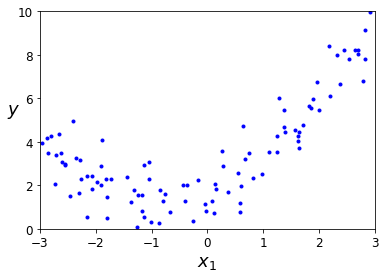

In [27]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

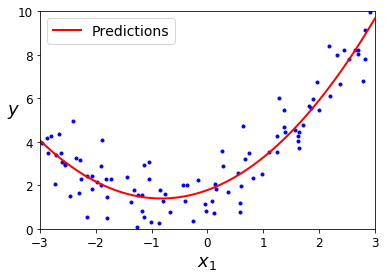

In [31]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Regularized models

### Ridge Regression

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution (using a matrix factorization technique by André-Louis Cholesky)

In [34]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.intercept_, ridge_reg.coef_

(array([1.00650911]), array([[0.36280369]]))

And using Stochastic Gradient Descent

In [35]:
sgd_reg=SGDRegressor(max_iter=50, tol=-np.infty, penalty='l2',
                    random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([0.63725132]), array([0.57453367]))

### Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.intercept_, lasso_reg.coef_

(array([1.14537356]), array([0.26167212]))

### Elastic Net

In [40]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.intercept_, elastic_net.coef_

(array([1.08639303]), array([0.30462619]))

## Logistic Regression

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

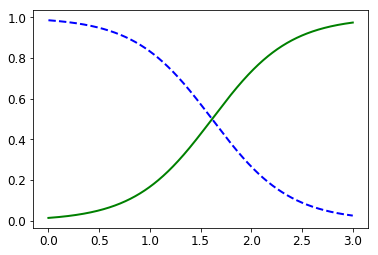

In [6]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")